# What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [3]:
df = pd.read_csv('data/human_body_temperature.csv')

In [4]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### Question 1 - Is the distribution of body temperatures normal?

In [5]:
df1 = df.temperature

In [6]:
df_degrees = pd.DataFrame(df1)
df_degrees.head()

,temperature
0,99.3
1,98.4
2,97.8
3,99.2
4,98.0


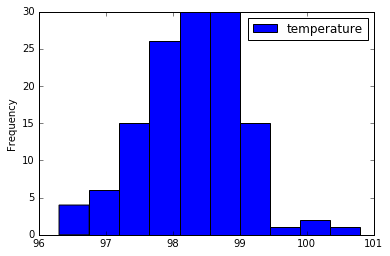

In [7]:
plt.figure();
df_degrees.plot.hist()

In [8]:
z, pval = stats.normaltest(df_degrees)

In [9]:
if(pval < 0.05):
    print "Distribution of body temperatures IS NOT normal"
else: 
    print "Distribution of body temperatures IS normal "

Distribution of body temperatures IS normal 


### Answer - Question 1
The distribution of body temperatures is normal, therefore the CLT applies.

### Question 2 - Is the true population mean really 98.6 degrees F?

In [10]:
df_degrees.mean()

temperature    98.249231
dtype: float64

In [11]:
len(df_degrees)

130

In [12]:
t_stat, t_pval = stats.ttest_1samp(df_degrees,98.6)
t_stat,t_pval

(array([-5.45482329]), array([  2.41063204e-07]))

In [13]:
if(t_pval < 0.05):
    print "True Population mean is most likely NOT 98.6 degrees F "
else: 
    print "True Population mean IS most likely 98.6 degrees F "

True Population mean is most likely NOT 98.6 degrees F 


### Answer - Question 2

Used T-test instead of z-test eventhough sample size was above the threshold of n=30, because population standard deviation was not known

Result of t-test's p-value suggest that we CANNOT ACCEPT the null hypothesis, which states that the true population's mean is 98.6 degrees F. 

### Question 3 - At what temperature should we consider someone's temperature to be "abnormal"?

In [16]:
moe = 1.96 * np.std(df_degrees)[0]/np.sqrt(len(df_degrees))
print "Margin of error is", moe

Margin of error is 0.125550964803


In [18]:
left = df_degrees.mean()[0]-moe
right = df_degrees.mean()[0]+moe
print "Confidence interval is", (left,right)


Confidence interval is (98.123679804428193, 98.374781734033363)


### Answer - Question 3 

Margin of error is 0.125550964803,
Confidence interval is (98.123679804428193, 98.374781734033363)

Therefore if someones temperature lies outside the range from 98.12F to 98.37F we can consider it abnormal.

### Question 4 - Is there a significant difference between males and females in normal temperature

In [20]:
df_male = df[df['gender']=='M']['temperature']
df_female = df[df['gender']=='F']['temperature']

In [21]:
t_stat2, pval2 = stats.ttest_ind(df_male, df_female)
t_stat2, pval2

(-2.2854345381656103, 0.023931883122395609)

In [22]:
if pval2 < 0.05:
    print "There IS a significant difference between the two genders"
else:
    print "There IS NOT  a significant difference between the two genders"

There IS a significant difference between the two genders


### Answer - Question 4 

After conducting a two sample t-test between both genders, we find that since the p-value is less than 0.05, we CANNOT accept the null hypothesis. Therefore we accept the alternate hypothesis that there is a significant difference in mean body temperatures betwenn the two genders.